# EPL Historical Data | Clustering clubs

In [1]:
# load libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# reading data
df = pd.read_json('ml_python_epl_data_17_18.json')


In [3]:
df = df.T
df.reset_index(level=0, inplace = True)


In [4]:
cols = list(df.columns)
cols

['index',
 'Accurate Long Balls',
 'Aerial Battles Lost',
 'Aerial Battles Won',
 'Appearances',
 'Assists',
 'Attack',
 'Big Chances Created',
 'Big Chances Missed',
 'Blocked Shots',
 'Catches',
 'Clean Sheets',
 'Clearances',
 'Clearances Off Line',
 'Club',
 'Cross Accuracy %',
 'Crosses',
 'Defence',
 'Discipline',
 'Duels Lost',
 'Duels Won',
 'Errors Leading To Goal',
 'Fouls',
 'Goal Kicks',
 'Goalkeeping',
 'Goals',
 'Goals Conceded',
 'Goals From Freekick',
 'Goals Per Match',
 'Goals With Header',
 'Goals With Left Foot',
 'Goals With Right Foot',
 'Headed Clearance',
 'High Claims',
 'Hit Woodwork',
 'Interceptions',
 'Last Man Tackles',
 'Losses',
 'Offsides',
 'Own Goals',
 'Passes',
 'Passes Per Match',
 'Penalties Saved',
 'Penalties Scored',
 'Position',
 'Punches',
 'Recoveries',
 'Red Cards',
 'Saves',
 'Shooting Accuracy %',
 'Shots',
 'Shots On Target',
 'Successful /s',
 'Successful 0/0s',
 'Successful 5/5s',
 'Successful 50/50s',
 'Sweeper Clearances',
 'Tackle S

In [5]:
df.describe()


,index,Accurate Long Balls,Aerial Battles Lost,Aerial Battles Won,Appearances,Assists,Attack,Big Chances Created,Big Chances Missed,Blocked Shots,...,Successful 5/5s,Successful 50/50s,Sweeper Clearances,Tackle Success %,Tackles,Team Play,Through Balls,Throw Outs,Wins,Yellow Cards
count,627,512,445,445,627,627,560,560,355,560,...,110,326,67,445,560,627,445,67,627,627
unique,627,248,179,174,193,49,1,50,44,95,...,1,136,37,45,233,1,67,48,118,54
top,Jesús Gámez,0,0,0,0,0,,0,0,0,...,0,1,0,0%,0,,0,0,0,0
freq,1,116,97,107,109,303,560,229,147,172,...,110,24,20,85,111,627,204,17,144,241


In [6]:
df.describe(include='all')


,index,Accurate Long Balls,Aerial Battles Lost,Aerial Battles Won,Appearances,Assists,Attack,Big Chances Created,Big Chances Missed,Blocked Shots,...,Successful 5/5s,Successful 50/50s,Sweeper Clearances,Tackle Success %,Tackles,Team Play,Through Balls,Throw Outs,Wins,Yellow Cards
count,627,512,445,445,627,627,560,560,355,560,...,110,326,67,445,560,627,445,67,627,627
unique,627,248,179,174,193,49,1,50,44,95,...,1,136,37,45,233,1,67,48,118,54
top,Jesús Gámez,0,0,0,0,0,,0,0,0,...,0,1,0,0%,0,,0,0,0,0
freq,1,116,97,107,109,303,560,229,147,172,...,110,24,20,85,111,627,204,17,144,241


In [7]:
col_types = list(df.dtypes)
len(col_types), set(col_types)

(64, {dtype('O')})

##### all columns are of type object

In [8]:
df.head()


,index,Accurate Long Balls,Aerial Battles Lost,Aerial Battles Won,Appearances,Assists,Attack,Big Chances Created,Big Chances Missed,Blocked Shots,...,Successful 5/5s,Successful 50/50s,Sweeper Clearances,Tackle Success %,Tackles,Team Play,Through Balls,Throw Outs,Wins,Yellow Cards
0,Rolando Aarons,7,9,6,14,1,,1,0,2,...,NaN,10,NaN,63%,16,,0,NaN,3,2
1,Tammy Abraham,NaN,NaN,NaN,7,0,,1,2,4,...,NaN,NaN,NaN,NaN,5,,NaN,NaN,1,0
2,Charlie Adam,784,148,216,196,25,,39,6,118,...,NaN,156,NaN,79%,304,,61,NaN,64,46
3,Adrián,862,NaN,NaN,106,0,NaN,NaN,NaN,NaN,...,NaN,NaN,84,NaN,NaN,,NaN,433,38,7
4,Ibrahim Afellay,72,20,15,43,2,,4,2,12,...,NaN,NaN,NaN,80%,30,,4,NaN,17,3


##### sorting by goals scored

In [9]:

df.sort_values(by=['Goals'], ascending=False)


,index,Accurate Long Balls,Aerial Battles Lost,Aerial Battles Won,Appearances,Assists,Attack,Big Chances Created,Big Chances Missed,Blocked Shots,...,Successful 5/5s,Successful 50/50s,Sweeper Clearances,Tackle Success %,Tackles,Team Play,Through Balls,Throw Outs,Wins,Yellow Cards
348,Romelu Lukaku,NaN,NaN,NaN,191,29,,27,64,140,...,NaN,NaN,NaN,NaN,51,,NaN,NaN,78,11
284,Jordan Ayew,NaN,NaN,NaN,49,3,,6,2,24,...,NaN,NaN,NaN,NaN,67,,NaN,NaN,9,7
447,Alex Oxlade-Chamberlain,158,75,51,134,14,,23,10,57,...,NaN,274,NaN,79%,138,,36,NaN,70,6
623,Mauro Zárate,NaN,NaN,NaN,43,2,,1,2,24,...,NaN,NaN,NaN,NaN,42,,NaN,NaN,13,4
20,Marcos Alonso,110,83,129,61,4,,5,NaN,24,...,NaN,47,NaN,74%,146,,5,NaN,40,11
125,Jack Colback,341,138,95,179,10,,9,2,19,...,NaN,56,NaN,78%,409,,9,NaN,49,37
619,Pablo Zabaleta,337,264,327,235,19,,27,NaN,48,...,NaN,64,NaN,74%,805,,21,NaN,135,57
103,Etienne Capoue,309,78,91,96,2,,1,9,26,...,NaN,97,NaN,72%,211,,7,NaN,35,15
574,Patrick van Aanholt,157,55,37,101,9,,10,NaN,24,...,NaN,122,NaN,77%,220,,4,NaN,25,10
78,George Boyd,46,149,79,101,5,,8,3,40,...,NaN,63,NaN,72%,240,,5,NaN,25,12


In [10]:
players = df['index'].unique()

##### check if any player field has missing values

In [11]:
for i, player in enumerate(players):
    if player == '':
        print(i)

14


In [12]:
df.iloc[[14]]

,index,Accurate Long Balls,Aerial Battles Lost,Aerial Battles Won,Appearances,Assists,Attack,Big Chances Created,Big Chances Missed,Blocked Shots,...,Successful 5/5s,Successful 50/50s,Sweeper Clearances,Tackle Success %,Tackles,Team Play,Through Balls,Throw Outs,Wins,Yellow Cards
14,,70,NaN,NaN,9,0,NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,,NaN,13,3,0


##### drop row 14 - player name is blank

In [13]:
df.drop(df.index[[14]], inplace=True)

In [14]:
df.iloc[[14]]

,index,Accurate Long Balls,Aerial Battles Lost,Aerial Battles Won,Appearances,Assists,Attack,Big Chances Created,Big Chances Missed,Blocked Shots,...,Successful 5/5s,Successful 50/50s,Sweeper Clearances,Tackle Success %,Tackles,Team Play,Through Balls,Throw Outs,Wins,Yellow Cards
15,Trent Alexander-Arnold,23,2,2,10,0,,1,NaN,1,...,NaN,4,NaN,62%,13,,0,NaN,5,2


##### filling na values

In [15]:
# na values
df.fillna(0, inplace=True)

In [16]:
tx = df.isnull().any()

tx.describe()


count        64
unique        1
top       False
freq         64
dtype: object

In [17]:
##### if any column still has got na values it should have displayed True

In [18]:
set(tx)

{False}

##### Accurate Long Balls        True

In [19]:
df['Accurate Long Balls'].isnull().sum()

0

In [20]:
df['Throw Outs'].isnull().sum()

0

In [21]:
df['Throw Outs'].unique()

array([0, '433', '9', '0', '705', '74', '612', '94', '183', '1,777',
       '440', '29', '766', '28', '134', '30', '862', '68', '242', '955',
       '83', '100', '1,188', '20', '1,432', '15', '292', '541', '98',
       '39', '581', '832', '42', '818', '376', '12', '58', '115', '5',
       '93', '191', '34', '273', '146', '208', '24', '801', '558'],
      dtype=object)

In [22]:
# df['Accurate Long Balls'] = df['Accurate Long Balls'].fillna(0)

# df['Accurate Long Balls'].isnull().sum()

##### replace ',''s from columns

# df['Accurate Long Balls'] = df['Accurate Long Balls'].str.replace(',','')
# df['Accurate Long Balls'] = pd.to_numeric(df['Accurate Long Balls'])

# df['Accurate Long Balls'].isnull().sum()

# df['Accurate Long Balls'].iloc[[0,1,2,3,4]]

# df['Accurate Long Balls'].head(5)

##### clearances column

# df['Clearances'].describe()

# df['Clearances'].unique()



##### helper function to remove ',', '.' and '%' from values in columns

In [23]:
def remove_commas(df, col):
    df[col] = df[col].str.replace(',','')
    df.fillna(0, inplace=True)
    return pd.to_numeric(df[col])

def remove_dots(df, col):
    df[col] = df[col].str.replace('.','')
    df.fillna(0, inplace=True)
    return pd.to_numeric(df[col])

def remove_percentages(df, col):
    df[col] = df[col].str.replace('%','')
    df.fillna(0, inplace=True)
    return pd.to_numeric(df[col])

In [24]:
num_cols_with_commas = ['Accurate Long Balls','Clearances','Crosses','Duels Lost','Shots',
                        'Duels Won','Goal Kicks','Headed Clearance','Passes','Recoveries','Throw Outs']

# num_cols_with_dots = ['Throw Outs']

num_cols_with_percentages = ['Cross Accuracy %','Shooting Accuracy %','Tackle Success %']

In [25]:
for col in num_cols_with_commas:
    df[col] = remove_commas(df, col)

In [26]:
for col in num_cols_with_percentages:
    df[col] = remove_percentages(df, col)

In [27]:
df['Throw Outs'].isnull().sum()
df['Throw Outs'].unique()

set(df.isnull().any())

{False}

In [28]:
df['Throw Outs'].unique()

array([   0,  433,    9,  705,   74,  612,   94,  183, 1777,  440,   29,
        766,   28,  134,   30,  862,   68,  242,  955,   83,  100, 1188,
         20, 1432,   15,  292,  541,   98,   39,  581,  832,   42,  818,
        376,   12,   58,  115,    5,   93,  191,   34,  273,  146,  208,
         24,  801,  558], dtype=int64)

In [29]:
# for col in num_cols_with_dots:
#    df[col] = remove_dots(df, col)


##### convert columns with numeric values to type int

In [30]:
numeric_cols = cols.copy()
numeric_cols.remove('index')
numeric_cols.remove('Club')
numeric_cols.remove('Position')

#numeric_cols.remove('Throw Outs')
#numeric_cols.remove('Cross Accuracy %')
#numeric_cols.remove('Crosses')
#numeric_cols.remove('Duels Lost')
#numeric_cols.remove('Duels Won')
#numeric_cols.remove('Goal Kicks')
#numeric_cols.remove('Headed Clearance')
#numeric_cols.remove('Passes')
#numeric_cols.remove('Recoveries')
#numeric_cols.remove('Shooting Accuracy %')
#numeric_cols.remove('Shots')
#numeric_cols.remove('Tackle Success %')
numeric_cols

['Accurate Long Balls',
 'Aerial Battles Lost',
 'Aerial Battles Won',
 'Appearances',
 'Assists',
 'Attack',
 'Big Chances Created',
 'Big Chances Missed',
 'Blocked Shots',
 'Catches',
 'Clean Sheets',
 'Clearances',
 'Clearances Off Line',
 'Cross Accuracy %',
 'Crosses',
 'Defence',
 'Discipline',
 'Duels Lost',
 'Duels Won',
 'Errors Leading To Goal',
 'Fouls',
 'Goal Kicks',
 'Goalkeeping',
 'Goals',
 'Goals Conceded',
 'Goals From Freekick',
 'Goals Per Match',
 'Goals With Header',
 'Goals With Left Foot',
 'Goals With Right Foot',
 'Headed Clearance',
 'High Claims',
 'Hit Woodwork',
 'Interceptions',
 'Last Man Tackles',
 'Losses',
 'Offsides',
 'Own Goals',
 'Passes',
 'Passes Per Match',
 'Penalties Saved',
 'Penalties Scored',
 'Punches',
 'Recoveries',
 'Red Cards',
 'Saves',
 'Shooting Accuracy %',
 'Shots',
 'Shots On Target',
 'Successful /s',
 'Successful 0/0s',
 'Successful 5/5s',
 'Successful 50/50s',
 'Sweeper Clearances',
 'Tackle Success %',
 'Tackles',
 'Team Pl

In [31]:
try:
    for i, col in enumerate(numeric_cols):
        print(i, col)
        df[col] = df[col].apply(pd.to_numeric)
except:
    print('%s cannot convert to numeric' % (col))

0 Accurate Long Balls
1 Aerial Battles Lost
2 Aerial Battles Won
3 Appearances
4 Assists
5 Attack
6 Big Chances Created
7 Big Chances Missed
8 Blocked Shots
9 Catches
10 Clean Sheets
11 Clearances
12 Clearances Off Line
13 Cross Accuracy %
14 Crosses
15 Defence
16 Discipline
17 Duels Lost
18 Duels Won
19 Errors Leading To Goal
20 Fouls
21 Goal Kicks
22 Goalkeeping
23 Goals
24 Goals Conceded
25 Goals From Freekick
26 Goals Per Match
27 Goals With Header
28 Goals With Left Foot
29 Goals With Right Foot
30 Headed Clearance
31 High Claims
32 Hit Woodwork
33 Interceptions
34 Last Man Tackles
35 Losses
36 Offsides
37 Own Goals
38 Passes
39 Passes Per Match
40 Penalties Saved
41 Penalties Scored
42 Punches
43 Recoveries
44 Red Cards
45 Saves
46 Shooting Accuracy %
47 Shots
48 Shots On Target
49 Successful /s
50 Successful 0/0s
51 Successful 5/5s
52 Successful 50/50s
53 Sweeper Clearances
54 Tackle Success %
55 Tackles
56 Team Play
57 Through Balls
58 Throw Outs
59 Wins
60 Yellow Cards


In [32]:
tx = df.dtypes

set(list(tx))

{dtype('int64'), dtype('float64'), dtype('O')}

In [33]:
df.describe()

,Accurate Long Balls,Aerial Battles Lost,Aerial Battles Won,Appearances,Assists,Attack,Big Chances Created,Big Chances Missed,Blocked Shots,Catches,...,Successful 5/5s,Successful 50/50s,Sweeper Clearances,Tackle Success %,Tackles,Team Play,Through Balls,Throw Outs,Wins,Yellow Cards
count,626.000000,626.000000,626.000000,626.000000,626.000000,66.0,626.000000,626.000000,626.000000,626.000000,...,626.0,626.000000,626.000000,626.00000,626.000000,0.0,626.000000,626.000000,626.000000,626.000000
mean,154.145367,51.035144,57.707668,67.110224,5.268371,0.0,5.817891,3.723642,18.124601,3.722045,...,0.0,35.945687,4.313099,41.86262,96.162939,NaN,8.638978,26.450479,27.929712,8.076677
std,286.704636,85.323490,120.735012,88.787904,11.435028,0.0,10.985754,9.727420,32.803763,22.515475,...,0.0,72.848096,22.512455,37.88277,153.996527,NaN,27.651731,145.448883,40.992388,13.152662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.00000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.00000,0.000000,NaN,0.000000,0.000000,1.000000,0.000000
50%,18.000000,4.000000,2.000000,27.500000,1.000000,0.0,1.000000,0.000000,3.000000,0.000000,...,0.0,1.000000,0.000000,64.50000,17.000000,NaN,0.000000,0.000000,10.000000,2.000000
75%,199.500000,76.000000,60.000000,106.000000,5.000000,0.0,6.000000,2.000000,23.000000,0.000000,...,0.0,38.000000,0.000000,76.00000,138.750000,NaN,4.000000,0.000000,41.000000,11.000000
max,1947.000000,520.000000,977.000000,632.000000,107.000000,0.0,82.000000,94.000000,294.000000,262.000000,...,0.0,609.000000,204.000000,100.00000,998.000000,NaN,354.000000,1777.000000,272.000000,119.000000


In [34]:
for col in cols:
    print(col, df[col].dtype)

index object
Accurate Long Balls int64
Aerial Battles Lost int64
Aerial Battles Won int64
Appearances int64
Assists int64
Attack float64
Big Chances Created int64
Big Chances Missed int64
Blocked Shots int64
Catches int64
Clean Sheets int64
Clearances int64
Clearances Off Line int64
Club object
Cross Accuracy % int64
Crosses int64
Defence float64
Discipline float64
Duels Lost int64
Duels Won int64
Errors Leading To Goal int64
Fouls int64
Goal Kicks int64
Goalkeeping float64
Goals int64
Goals Conceded int64
Goals From Freekick int64
Goals Per Match float64
Goals With Header int64
Goals With Left Foot int64
Goals With Right Foot int64
Headed Clearance int64
High Claims int64
Hit Woodwork int64
Interceptions int64
Last Man Tackles int64
Losses int64
Offsides int64
Own Goals int64
Passes int64
Passes Per Match float64
Penalties Saved int64
Penalties Scored int64
Position object
Punches int64
Recoveries int64
Red Cards int64
Saves int64
Shooting Accuracy % int64
Shots int64
Shots On Target 

In [35]:
df['Team Play']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
       ..
597   NaN
598   NaN
599   NaN
600   NaN
601   NaN
602   NaN
603   NaN
604   NaN
605   NaN
606   NaN
607   NaN
608   NaN
609   NaN
610   NaN
611   NaN
612   NaN
613   NaN
614   NaN
615   NaN
616   NaN
617   NaN
618   NaN
619   NaN
620   NaN
621   NaN
622   NaN
623   NaN
624   NaN
625   NaN
626   NaN
Name: Team Play, Length: 626, dtype: float64

In [36]:
pd.CategoricalIndex(df)

CategoricalIndex(['index', 'Accurate Long Balls', 'Aerial Battles Lost',
                  'Aerial Battles Won', 'Appearances', 'Assists', 'Attack',
                  'Big Chances Created', 'Big Chances Missed', 'Blocked Shots',
                  'Catches', 'Clean Sheets', 'Clearances',
                  'Clearances Off Line', 'Club', 'Cross Accuracy %', 'Crosses',
                  'Defence', 'Discipline', 'Duels Lost', 'Duels Won',
                  'Errors Leading To Goal', 'Fouls', 'Goal Kicks',
                  'Goalkeeping', 'Goals', 'Goals Conceded',
                  'Goals From Freekick', 'Goals Per Match',
                  'Goals With Header', 'Goals With Left Foot',
                  'Goals With Right Foot', 'Headed Clearance', 'High Claims',
                  'Hit Woodwork', 'Interceptions', 'Last Man Tackles',
                  'Losses', 'Offsides', 'Own Goals', 'Passes',
                  'Passes Per Match', 'Penalties Saved', 'Penalties Scored',
                  'Posi

#### Correlation

In [37]:
correlations = df.corr()

In [38]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
# array([[False, False],
#       [False, False]])

mask[np.triu_indices_from(mask)] = True
# array([[ True,  True],
#       [False,  True]])



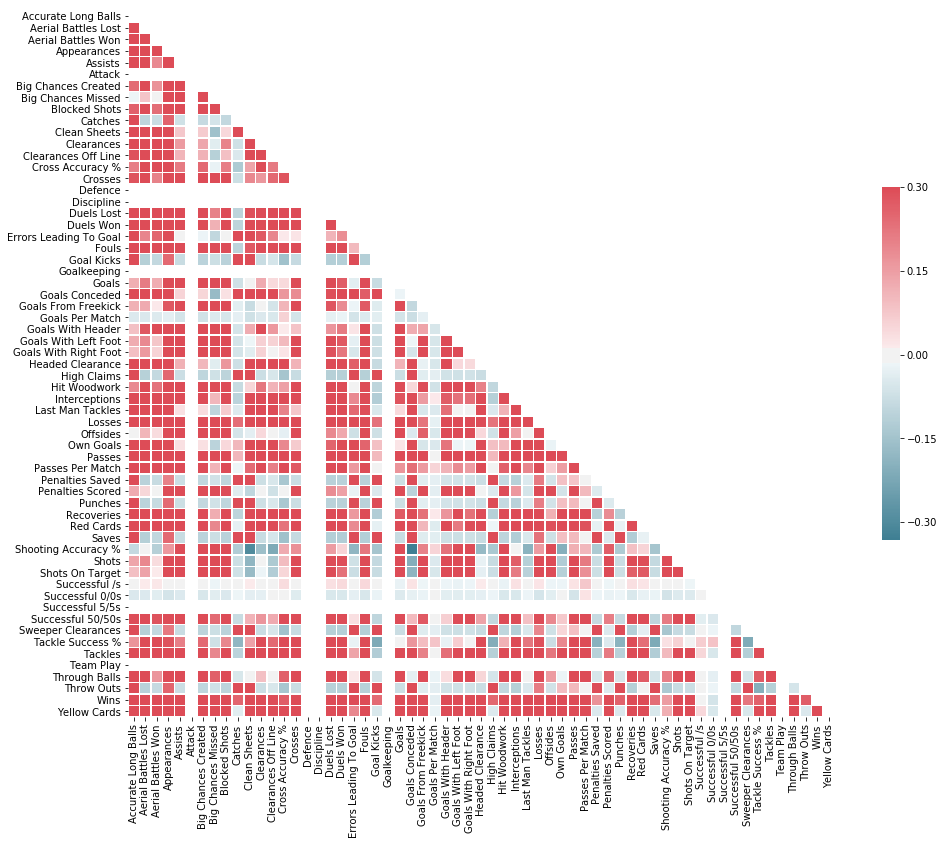

In [39]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Visualizations!!

---

#### Univariate analysis
---

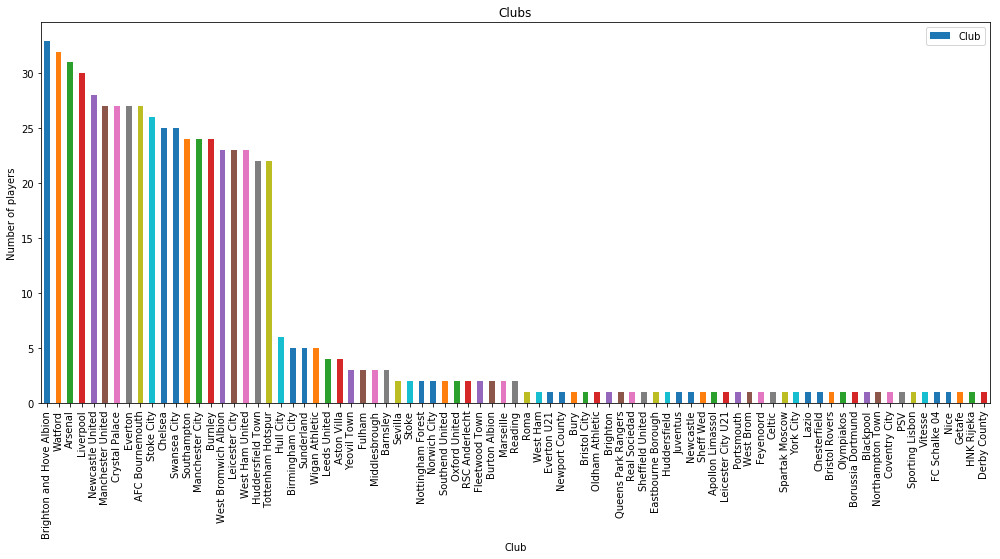

In [40]:
plt.figure(figsize=(17,7))
df['Club'].value_counts().plot.bar()
plt.title('Clubs')
plt.xlabel('Club')
plt.ylabel('Number of players')
plt.legend()

In [41]:
len(df['index'].unique()), len(df['Club'].unique())

(626, 81)

##### Out of the data for 626 players from 81 clubs, Brighton and Howe Albion has got the max number of players - 35, followed by Watford, Arsenal, Liverpool and Newcastle United


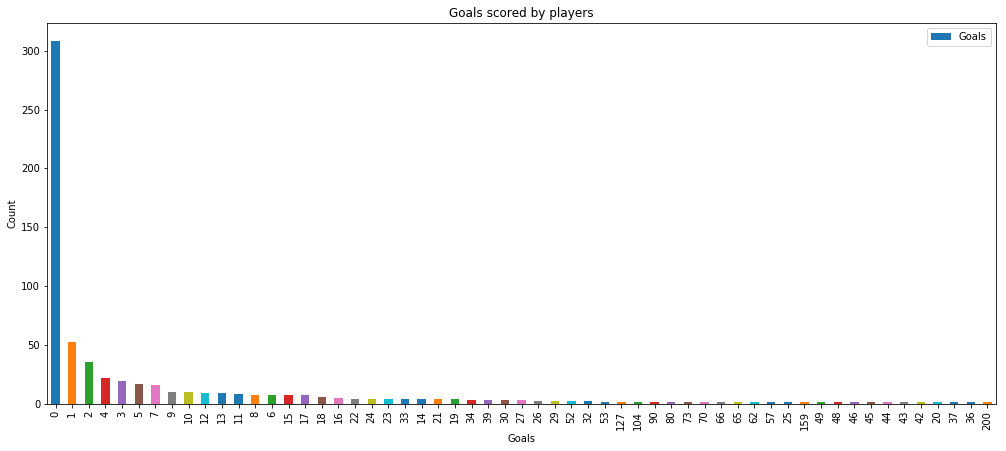

In [42]:
plt.figure(figsize=(17,7))
df['Goals'].value_counts().plot.bar()
plt.title('Goals scored by players')
plt.xlabel('Goals')
plt.ylabel('Count')

# for a,b in zip(df.Goals.values, df.index.values):
#    plt.text(0,0,b)
    
plt.legend()
# plt.savefig('dd.png')

##### Maximum number of goals scored by a player is 200; whereas more than 300 players (nearly half) has not scored a single goal!


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021765864278>,
      dtype=object)

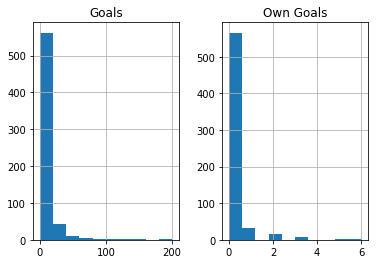

In [43]:
df[['Goals','Own Goals']].hist()

In [44]:
len(numeric_cols)

61

In [45]:
len(df.columns)

64

In [46]:
cat_cols = ['index','Club','Position']
len(cat_cols)

3

In [47]:
df['Throw Outs'].unique()

array([   0,  433,    9,  705,   74,  612,   94,  183, 1777,  440,   29,
        766,   28,  134,   30,  862,   68,  242,  955,   83,  100, 1188,
         20, 1432,   15,  292,  541,   98,   39,  581,  832,   42,  818,
        376,   12,   58,  115,    5,   93,  191,   34,  273,  146,  208,
         24,  801,  558], dtype=int64)

In [48]:
pd.get_dummies(df['Position']).head(7)

,Defender,Forward,Goalkeeper,Midfielder
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1
5,0,1,0,0
6,0,1,0,0


In [49]:
df = pd.concat([df, pd.get_dummies(df['Position'])], axis=1)

df.head()

,index,Accurate Long Balls,Aerial Battles Lost,Aerial Battles Won,Appearances,Assists,Attack,Big Chances Created,Big Chances Missed,Blocked Shots,...,Tackles,Team Play,Through Balls,Throw Outs,Wins,Yellow Cards,Defender,Forward,Goalkeeper,Midfielder
0,Rolando Aarons,7,9,6,14,1,NaN,1,0,2,...,16,NaN,0,0,3,2,0,0,0,1
1,Tammy Abraham,0,0,0,7,0,NaN,1,2,4,...,5,NaN,0,0,1,0,0,1,0,0
2,Charlie Adam,784,148,216,196,25,NaN,39,6,118,...,304,NaN,61,0,64,46,0,0,0,1
3,Adrián,862,0,0,106,0,0.0,0,0,0,...,0,NaN,0,433,38,7,0,0,1,0
4,Ibrahim Afellay,72,20,15,43,2,NaN,4,2,12,...,30,NaN,4,0,17,3,0,0,0,1


In [50]:
numeric_cols.append('Defender')
numeric_cols.append('Forward')
numeric_cols.append('Goalkeeper')
numeric_cols.append('Midfielder')
len(numeric_cols)

65

In [51]:
# numeric_cols.append('Team Play')
# numeric_cols.remove('Attack')
# numeric_cols.remove('Defence')
# numeric_cols.remove('Discipline')
# 
# len(numeric_cols)

### Clustering

In [52]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [53]:
df.fillna(0, inplace=True)

In [54]:
X_epl = df[numeric_cols].values
X_epl.shape

(626, 65)

In [55]:
# df.fillna(0, inplace=True)

In [56]:
# df.isnull().any()

In [57]:
#KMeans
km = KMeans(n_clusters=3)
km.fit(X_epl)
km.predict(X_epl)
labels = km.labels_

Text(0.5,0.92,'K Means')

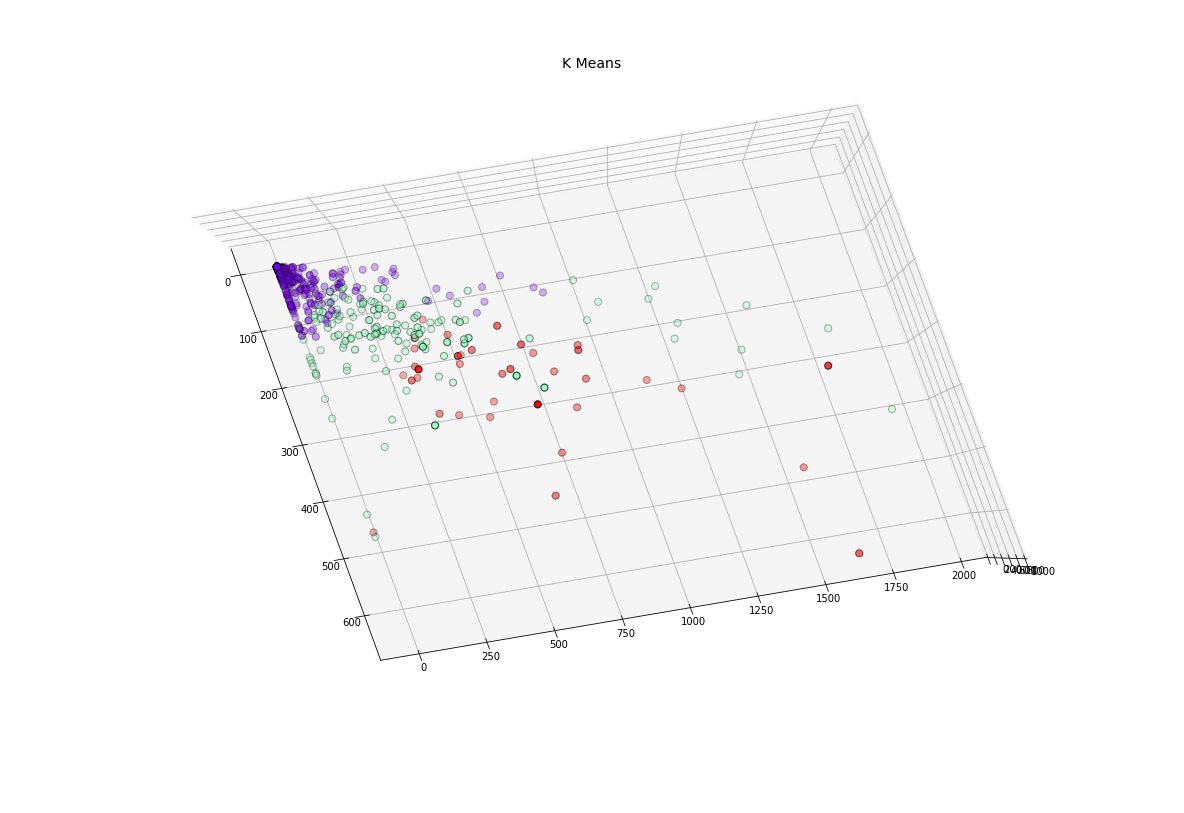

In [58]:
#Plotting
fig = plt.figure(1, figsize=(17,11))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=88, azim=-14)
ax.scatter(X_epl[:, 3], X_epl[:, 0], X_epl[:, 2], cmap='rainbow', 
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
plt.title("K Means", fontsize=14)



##### ValueError: Colormap blue is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


#### Heirarchical Clustering

In [59]:
req_cols = ['Goals', 'Goals Conceded']
req_cols

['Goals', 'Goals Conceded']

In [60]:
df['Goals'].describe()

count    626.000000
mean       7.044728
std       16.762279
min        0.000000
25%        0.000000
50%        1.000000
75%        7.000000
max      200.000000
Name: Goals, dtype: float64

In [61]:
df.columns

Index(['index', 'Accurate Long Balls', 'Aerial Battles Lost',
       'Aerial Battles Won', 'Appearances', 'Assists', 'Attack',
       'Big Chances Created', 'Big Chances Missed', 'Blocked Shots', 'Catches',
       'Clean Sheets', 'Clearances', 'Clearances Off Line', 'Club',
       'Cross Accuracy %', 'Crosses', 'Defence', 'Discipline', 'Duels Lost',
       'Duels Won', 'Errors Leading To Goal', 'Fouls', 'Goal Kicks',
       'Goalkeeping', 'Goals', 'Goals Conceded', 'Goals From Freekick',
       'Goals Per Match', 'Goals With Header', 'Goals With Left Foot',
       'Goals With Right Foot', 'Headed Clearance', 'High Claims',
       'Hit Woodwork', 'Interceptions', 'Last Man Tackles', 'Losses',
       'Offsides', 'Own Goals', 'Passes', 'Passes Per Match',
       'Penalties Saved', 'Penalties Scored', 'Position', 'Punches',
       'Recoveries', 'Red Cards', 'Saves', 'Shooting Accuracy %', 'Shots',
       'Shots On Target', 'Successful /s', 'Successful 0/0s',
       'Successful 5/5s', 'Succ

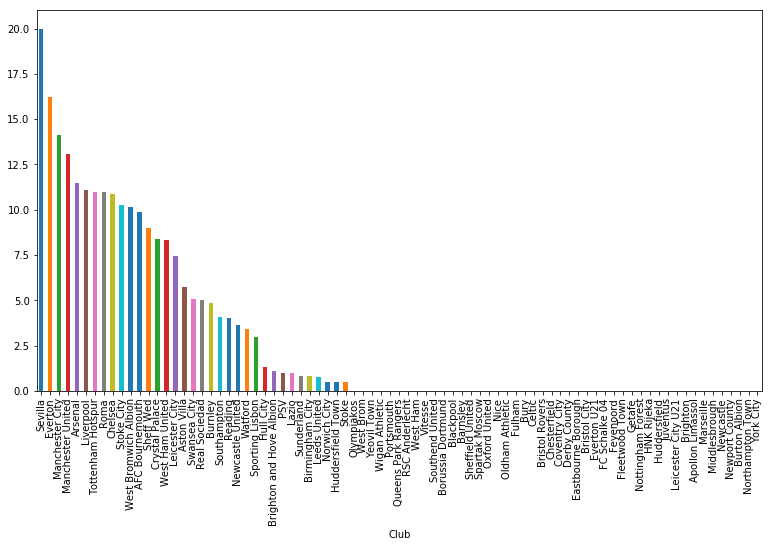

In [62]:
plt.figure(figsize=(13,7))
pd.pivot_table(df,index=['Club']).sort_values(by='Goals', ascending=False)['Goals'].plot.bar()

In [63]:
club_player_goals = df.groupby(['Club','index'])['Goals'].sum()
club_player_goals = pd.DataFrame(club_player_goals).reset_index()
club_player_goals.columns = ['Club','Player','Goals']
club_player_goals.head()

,Club,Player,Goals
0,AFC Bournemouth,Aaron Ramsdale,0
1,AFC Bournemouth,Adam Smith,3
2,AFC Bournemouth,Andrew Surman,5
3,AFC Bournemouth,Artur Boruc,0
4,AFC Bournemouth,Asmir Begovic,1


#### Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [65]:
le = LabelEncoder()
le

LabelEncoder()

In [66]:
le.fit(club_player_goals['Club'].values)

LabelEncoder()

In [67]:
le.classes_

array(['AFC Bournemouth', 'Apollon Limassol', 'Arsenal', 'Aston Villa',
       'Barnsley', 'Birmingham City', 'Blackpool', 'Borussia Dortmund',
       'Brighton', 'Brighton and Hove Albion', 'Bristol City',
       'Bristol Rovers', 'Burnley', 'Burton Albion', 'Bury', 'Celtic',
       'Chelsea', 'Chesterfield', 'Coventry City', 'Crystal Palace',
       'Derby County', 'Eastbourne Borough', 'Everton', 'Everton U21',
       'FC Schalke 04', 'Feyenoord', 'Fleetwood Town', 'Fulham', 'Getafe',
       'HNK Rijeka', 'Huddersfield', 'Huddersfield Town', 'Hull City',
       'Juventus', 'Lazio', 'Leeds United', 'Leicester City',
       'Leicester City U21', 'Liverpool', 'Manchester City',
       'Manchester United', 'Marseille', 'Middlesbrough', 'Newcastle',
       'Newcastle United', 'Newport County', 'Nice', 'Northampton Town',
       'Norwich City', 'Nottingham Forest', 'Oldham Athletic',
       'Olympiakos', 'Oxford United', 'PSV', 'Portsmouth',
       'Queens Park Rangers', 'RSC Anderlecht',

In [68]:
le.transform(['Nice'])

array([46], dtype=int64)

In [69]:
len(le.classes_)

81

In [70]:
le.transform(club_player_goals['Club'].values)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  5,  5,  6,  7,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 14,
       15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 18, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 20, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23,
       24, 25, 26, 26, 27

In [71]:
le.inverse_transform([22,45])

E:\Python\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Everton', 'Newport County'], dtype=object)

In [72]:
club_player_goals['Enc'] = le.transform(club_player_goals['Club'].values)
club_player_goals.head()

,Club,Player,Goals,Enc
0,AFC Bournemouth,Aaron Ramsdale,0,0
1,AFC Bournemouth,Adam Smith,3,0
2,AFC Bournemouth,Andrew Surman,5,0
3,AFC Bournemouth,Artur Boruc,0,0
4,AFC Bournemouth,Asmir Begovic,1,0


In [73]:
X = club_player_goals[['Goals','Enc']].values
X.shape

(626, 2)

In [74]:
x0, x1 = X[:,0], X[:,1]
x0.shape, x1.shape

((626,), (626,))

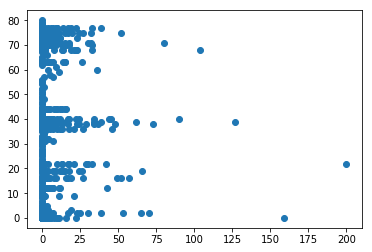

In [75]:
plt.scatter(x0, x1, )

### Clustering using MeanShift

In [76]:
from sklearn.cluster import MeanShift

In [77]:
# MeanShift()
ms = MeanShift()
ms

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [78]:
# fit - applying the formula on the variable
ms.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [79]:
labels = ms.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,

In [80]:
cluster_centers = ms.cluster_centers_
cluster_centers

array([[  2.73578595,  27.40133779],
       [  3.83084577,  69.89054726],
       [ 53.6       ,  10.9       ],
       [ 72.75      ,  34.        ],
       [159.        ,   0.        ],
       [200.        ,  22.        ],
       [127.        ,  39.        ],
       [104.        ,  68.        ],
       [ 80.        ,  71.        ]])

In [81]:
# number of clusters
n_clusters_ = len(set(labels))
n_clusters_

9

In [82]:
# define the colors
colors = ['g','r','y','c','r','o','m','p','v','o','g']
colors

['g', 'r', 'y', 'c', 'r', 'o', 'm', 'p', 'v', 'o', 'g']

No handles with labels found to put in legend.


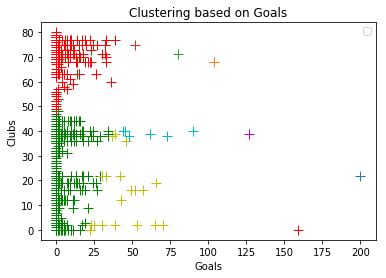

In [83]:
# plotting between x0 and x1

plt.title('Clustering based on Goals')

for i in range(len(X)):
    plt.plot(x0[i], x1[i], colors[labels[i]], marker='+', markersize=10)

plt.xlabel('Goals')
plt.ylabel('Clubs')
plt.legend()

Text(0,0.5,'Clubs')

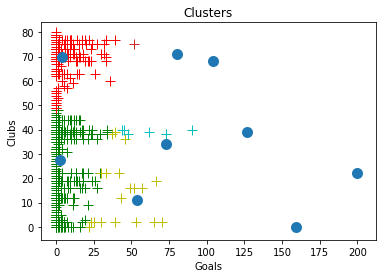

In [84]:
# plotting between x0 and x1
plt.title('Clusters')

for i in range(len(X)):
    plt.plot(x0[i], x1[i], colors[labels[i]], marker='+', markersize=10)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='o',
           linewidths=5, zorder=10)

plt.xlabel('Goals')
plt.ylabel('Clubs')

In [85]:
X_ = club_player_goals['Enc'].values.reshape(-1,1)
X_.shape

(626, 1)

In [86]:
ohe = OneHotEncoder()
ohe

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [87]:
ohe.fit(X_)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [88]:
ohe.n_values_

array([81])

In [89]:
ohe.feature_indices_

array([ 0, 81], dtype=int32)

In [90]:
ohe_clubs = ohe.transform(X_).toarray()
ohe_clubs.shape

(626, 81)

In [91]:
df_ = pd.DataFrame(ohe_clubs)
df_.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df_['Goals'] = club_player_goals['Goals']

In [93]:
df_.head()

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,Goals
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


#### PCA

In [94]:
from sklearn.decomposition import PCA

In [95]:
pca = PCA(n_components=2)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [96]:
principalComponents = pca.fit_transform(df_)
principalComponents.shape

(626, 2)

In [97]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2'])
principalDf.head()

,PC1,PC2
0,-7.044385,-0.079072
1,-4.044399,-0.077445
2,-2.044409,-0.076361
3,-7.044385,-0.079072
4,-6.044390,-0.078530


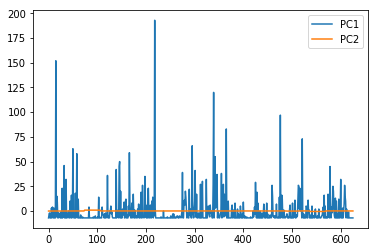

In [98]:
principalDf.plot()

### Feature selection

In [99]:
X_ = np.array([principalDf['PC1'].values, principalDf['PC2'].values]).T
X_.shape

(626, 2)

In [100]:
x0, x1 = X_[:,0], X_[:,1]
x0.shape, x1.shape

((626,), (626,))

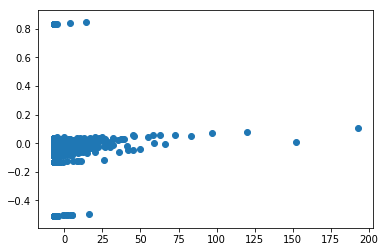

In [101]:
plt.scatter(x0, x1, )

#### Clustering

In [102]:
# MeanShift()
ms = MeanShift()
ms

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [103]:
# fit - applying the formula on the variable
ms.fit(X_)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [104]:
labels = ms.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1,

In [105]:
cluster_centers = ms.cluster_centers_
cluster_centers

array([[-5.98175624e+00,  5.48490318e-03],
       [ 2.37283333e+01,  1.65798750e-03],
       [ 3.57737874e+01, -8.39749891e-05],
       [ 6.14554741e+01,  2.71172410e-02],
       [ 1.51954867e+02,  7.15840399e-03],
       [ 1.92955653e+02,  1.04398858e-01],
       [ 1.19955553e+02,  7.73829720e-02],
       [ 8.29556869e+01,  5.09508339e-02],
       [ 9.69551713e+01,  6.88755577e-02],
       [ 7.29553024e+01,  5.85521073e-02]])

No handles with labels found to put in legend.


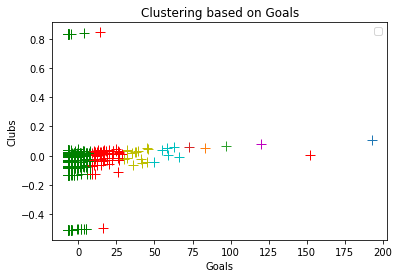

In [106]:
# plotting between x0 and x1

plt.title('Clustering based on Goals')

for i in range(len(X_)):
    plt.plot(x0[i], x1[i], colors[labels[i]], marker='+', markersize=10)

plt.xlabel('Goals')
plt.ylabel('Clubs')
plt.legend()

Text(0,0.5,'Clubs')

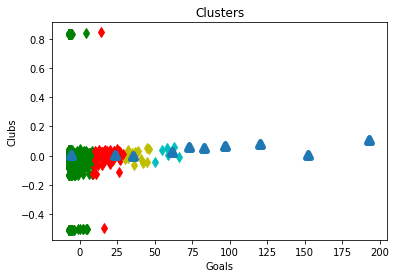

In [107]:
# plotting between x0 and x1
plt.title('Clusters')

for i in range(len(X_)):
    plt.plot(x0[i], x1[i], colors[labels[i]], marker='d', markersize=7)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='^',
           linewidths=5, zorder=10)

plt.xlabel('Goals')
plt.ylabel('Clubs')